# **Graded Challenge 2**
### **HACTIV8 Full Time Data Science Phase 1**

# **1. Perkenalan** 

## **1.1 Identitas**

> Nama  : Ropiudin

> Batch : FTDS OO2-HCK

> Graded Challenge : Graded Challenge 2 

## **1.2 Query**

> Pada Graded Challenge ini dataset yang digunakan adalah dataset `ml_datasets` dari database bernama `census_adult_income` dengan menggunakan query sebagai berikut:

> SELECT age, workclass, education, education_num, marital_status, occupation, 
      relationship, race, sex, capital_gain, capital_loss, hours_per_week, 
      native_country, income_bracket
FROM `bigquery-public-data.ml_datasets.census_adult_income`
WHERE workclass != ' ?' AND hours_per_week < 100
LIMIT 3966



## **1.3 Objective**

> Pada Graded Challenge ini akan dilakukan pembuatan model machine learning classification dengan menggunakan Logistic Regression dan SVM untuk memprediksi `income bracket`pada database yang digunakan

# **2. Import Libraries** 

In [6]:
!pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 276 kB 26.4 MB/s 


In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import  StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,confusion_matrix

import warnings
warnings.filterwarnings(action='ignore')

> Code di atas merupakan daftar *library* yang digunakan dalam project

# **3. Data Loading** 

In [8]:
df = pd.read_csv('/content/drive/MyDrive/DATA/h8dsft_P1G2_Ropiudin.csv',na_values = ['?','99999'], skipinitialspace=True)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option("display.precision", 0)

In [9]:
df.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,18,Never-worked,Some-college,10,Never-married,NaN,Own-child,White,Male,0.000,0,4,United-States,<=50K
1,37,Private,12th,8,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0.000,0,33,NaN,<=50K
2,39,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Sales,Wife,Black,Female,0.000,0,54,Dominican-Republic,>50K
3,29,Private,HS-grad,9,Married-civ-spouse,Sales,Wife,White,Female,0.000,0,18,United-States,<=50K
4,64,Private,HS-grad,9,Married-civ-spouse,Sales,Wife,White,Female,0.000,0,21,United-States,<=50K


In [10]:
df.tail()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
3961,67,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,1797.000,0,20,United-States,<=50K
3962,75,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.000,0,20,United-States,<=50K
3963,82,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.000,0,20,United-States,<=50K
3964,84,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.000,0,20,United-States,<=50K
3965,61,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.000,0,20,United-States,>50K


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3966 entries, 0 to 3965
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             3966 non-null   int64  
 1   workclass       3966 non-null   object 
 2   education       3966 non-null   object 
 3   education_num   3966 non-null   int64  
 4   marital_status  3966 non-null   object 
 5   occupation      3964 non-null   object 
 6   relationship    3966 non-null   object 
 7   race            3966 non-null   object 
 8   sex             3966 non-null   object 
 9   capital_gain    3951 non-null   float64
 10  capital_loss    3966 non-null   int64  
 11  hours_per_week  3966 non-null   int64  
 12  native_country  3899 non-null   object 
 13  income_bracket  3966 non-null   object 
dtypes: float64(1), int64(4), object(9)
memory usage: 433.9+ KB


In [12]:
df.isnull().sum()

age                0
workclass          0
education          0
education_num      0
marital_status     0
occupation         2
relationship       0
race               0
sex                0
capital_gain      15
capital_loss       0
hours_per_week     0
native_country    67
income_bracket     0
dtype: int64

In [13]:
df.isnull().mean()

age              0.000
workclass        0.000
education        0.000
education_num    0.000
marital_status   0.000
occupation       0.001
relationship     0.000
race             0.000
sex              0.000
capital_gain     0.004
capital_loss     0.000
hours_per_week   0.000
native_country   0.017
income_bracket   0.000
dtype: float64

In [14]:
df[df.duplicated()].shape

(259, 14)

In [15]:
num_col = df.describe().columns.tolist()
cat_col = df.select_dtypes(include=['object']).columns.tolist()

In [16]:
# numeric overview
df[num_col].describe()

,age,education_num,capital_gain,capital_loss,hours_per_week
count,3966.000,3966.000,3951.000,3966.000,3966.000
mean,37.079,9.726,393.704,76.080,32.196
std,17.119,2.590,2088.344,380.815,24.075
min,17.000,1.000,0.000,0.000,1.000
25%,22.000,9.000,0.000,0.000,15.000
50%,33.000,10.000,0.000,0.000,20.000
75%,49.000,11.000,0.000,0.000,46.000
max,90.000,16.000,34095.000,4356.000,99.000


In [17]:
# categorical overview
for i in cat_col:
    print(i)
    print()
    print(df[i].value_counts())
    print('-' * 10)

workclass

Private             2855
Self-emp-not-inc     428
Local-gov            253
State-gov            229
Self-emp-inc         125
Federal-gov           71
Without-pay            3
Never-worked           2
Name: workclass, dtype: int64
----------
education

Some-college    1111
HS-grad         1069
Bachelors        490
11th             307
Masters          166
10th             158
Assoc-voc        119
Assoc-acdm       117
12th              86
7th-8th           84
Prof-school       69
9th               67
Doctorate         48
5th-6th           35
1st-4th           33
Preschool          7
Name: education, dtype: int64
----------
marital_status

Never-married            1817
Married-civ-spouse       1333
Divorced                  438
Widowed                   217
Separated                 108
Married-spouse-absent      50
Married-AF-spouse           3
Name: marital_status, dtype: int64
----------
occupation

Other-service        809
Sales                625
Adm-clerical         565
P

Berdasarkan hasil di atas diperoleh informasi:

1. dataset yang digunakan terdiri dari 14 kolom dan 3966 baris yang mana pada kolom terdapat 5 kolom data numerik dan 9 kolom data kategorik

2. terdapat outlier pada kolom `occupation`, `capital_gain` dan `native_country` masing - masing sebanyak 2, 15 dan 67 yang nantinya akan didrop pada tahap  selanjutnya

3. terdapat data duplikat yaitu sebanyak 259 data dan yang nantinya akan didrop pada tahap  selanjutnya

# **4. Data Cleaning** 

In [18]:
df_clean = df.copy()
df_clean.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,18,Never-worked,Some-college,10,Never-married,NaN,Own-child,White,Male,0.000,0,4,United-States,<=50K
1,37,Private,12th,8,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0.000,0,33,NaN,<=50K
2,39,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Sales,Wife,Black,Female,0.000,0,54,Dominican-Republic,>50K
3,29,Private,HS-grad,9,Married-civ-spouse,Sales,Wife,White,Female,0.000,0,18,United-States,<=50K
4,64,Private,HS-grad,9,Married-civ-spouse,Sales,Wife,White,Female,0.000,0,21,United-States,<=50K


In [19]:
df_clean.isnull().mean()

age              0.000
workclass        0.000
education        0.000
education_num    0.000
marital_status   0.000
occupation       0.001
relationship     0.000
race             0.000
sex              0.000
capital_gain     0.004
capital_loss     0.000
hours_per_week   0.000
native_country   0.017
income_bracket   0.000
dtype: float64

In [20]:
df_clean.isnull().mean().sum()

0.02118003025718608

In [21]:
df_clean.dropna(axis=0,inplace=True)

In [22]:
df_clean.isnull().mean().sum()

0.0

In [23]:
df_clean.drop_duplicates(inplace=True)
df_clean[df_clean.duplicated()].shape

(0, 14)

In [24]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3623 entries, 2 to 3965
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             3623 non-null   int64  
 1   workclass       3623 non-null   object 
 2   education       3623 non-null   object 
 3   education_num   3623 non-null   int64  
 4   marital_status  3623 non-null   object 
 5   occupation      3623 non-null   object 
 6   relationship    3623 non-null   object 
 7   race            3623 non-null   object 
 8   sex             3623 non-null   object 
 9   capital_gain    3623 non-null   float64
 10  capital_loss    3623 non-null   int64  
 11  hours_per_week  3623 non-null   int64  
 12  native_country  3623 non-null   object 
 13  income_bracket  3623 non-null   object 
dtypes: float64(1), int64(4), object(9)
memory usage: 424.6+ KB


> Pada tahapan Data Cleaning:

1. Dilakukan handling missing value, yang mana pada dataset terdapat missing value sebanyak 0.021% dari dataset keseluruhan, dikarnakan terdapat missing value yang tidak terlalu banyak maka dilakukan drop terhadapat mising value

2. Dan pada tahapan ini juga dilakukan drop pada data yang duplicate, sehingga diperoleh data yang sudah bersih dari mising value dan data duplicate sebanyak 3623 baris 14 kolom

# **5. Exploratory Data Analysis (EDA)** 

In [25]:
df_clean['income_bracket'].value_counts().reset_index()

,index,income_bracket
0,<=50K,3044
1,>50K,579


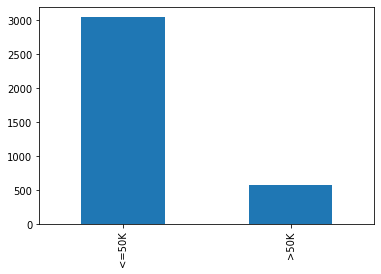

In [26]:
df_clean['income_bracket'].value_counts().plot(kind='bar')

> Dari hasil diatas baik berdasarkan tabel atau grafik diperoleh informasi bahwa pada kolom data income_braket terdapat 2 label yaitu <=50K yang memiliki 3044 data dan >50K yang 579 data, dari hasil ini dapat disimpulkan pada kolom income_braket memiliki data yang tidak imballance. Dan pada kolom income_braket akan didefinisikan sebagai target

In [27]:
df_under = df_clean[
    (df_clean['income_bracket'] == '<=50K') 
].groupby(['occupation'])['income_bracket'].count().sort_values(ascending=False).reset_index()
df_under

,occupation,income_bracket
0,Other-service,661
1,Adm-clerical,477
2,Sales,457
3,Prof-specialty,365
4,Craft-repair,226
5,Exec-managerial,192
6,Farming-fishing,142
7,Handlers-cleaners,135
8,Transport-moving,109
9,Tech-support,96


In [28]:
df_upper = df_clean[
    (df_clean['income_bracket'] == '>50K') 
].groupby(['occupation'])['income_bracket'].count().sort_values(ascending=False).reset_index()
df_upper

,occupation,income_bracket
0,Prof-specialty,133
1,Exec-managerial,114
2,Sales,71
3,Craft-repair,60
4,Adm-clerical,45
5,Protective-serv,37
6,Transport-moving,35
7,Tech-support,23
8,Other-service,22
9,Farming-fishing,19


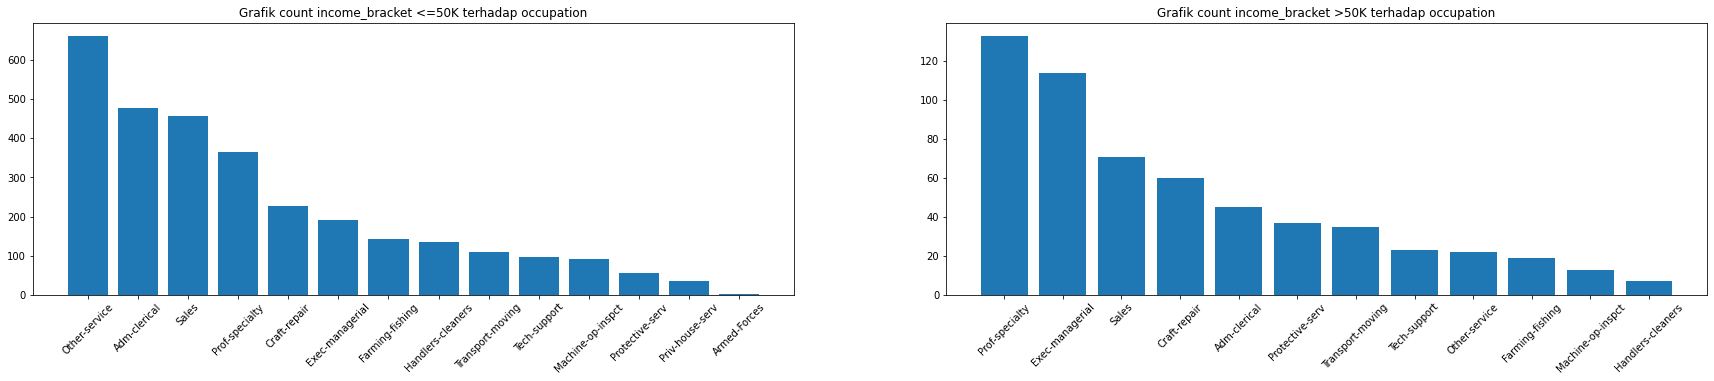

In [29]:
plt.figure(figsize=(30, 5))
plt.subplot(1, 2, 1)
plt.bar(x=df_under['occupation'], height=df_under['income_bracket'])
plt.xticks(df_under['occupation'])
plt.title('Grafik count income_bracket <=50K terhadap occupation')
plt.xticks(rotation = 45)

plt.subplot(1, 2, 2)
plt.bar(x=df_upper['occupation'], height=df_upper['income_bracket'])
plt.xticks(df_upper['occupation'])
plt.title('Grafik count income_bracket >50K terhadap occupation')
plt.xticks(rotation = 45)
plt.show()

> Dari hasil diatas baik berdasarkan tabel atau grafik diperoleh informasi terkait occupation apa saja yang terdapat pada label <=50K dan >50K dikolom income_bracket yang mana pada label <=50K, occupation other-service merupakan occupation terbanyak, yaitu sebanyak 661 sedangkan occupation armed-forces merupakan occupation tersedikit, yaitu sebanyak 1.

> Pada label >50K, occupation prof-special merupakan occupation terbanyak, yaitu sebanyak 133 sedangkan occupation handlers-cleaners merupakan occupation tersedikit, yaitu sebanyak 3.

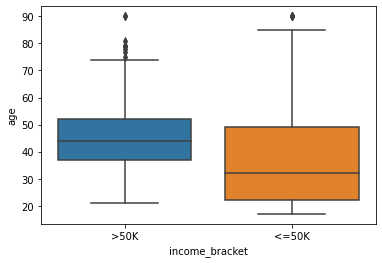

In [30]:
sns.boxplot(data=df_clean, x='income_bracket', y='age')

> Dari hasil boxplot diatas antara age dan income_bracket diperoleh informasi bahwa secara visual terdapat outlier, akan tetapi perlu diuji apakah emang betul outlier atau bukan

# **6. Data Preprocessing** 

### **Splitting between `X` (Features), `y` (Target) and `inf` (Inference)**

In [31]:
df_inf = df_clean.sample(5,random_state=0)
df_inf

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
238,67,Private,HS-grad,9,Widowed,Sales,Not-in-family,White,Female,991.000,0,18,United-States,<=50K
2377,66,Private,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0.000,0,10,United-States,<=50K
1000,39,Private,Some-college,10,Separated,Other-service,Unmarried,White,Female,0.000,0,75,United-States,<=50K
1674,58,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.000,0,72,United-States,<=50K
2680,22,Private,10th,6,Never-married,Craft-repair,Own-child,White,Male,0.000,0,15,United-States,<=50K


In [32]:
df_clean = df_clean.drop(df_inf.index)
df_clean

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
2,39,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Sales,Wife,Black,Female,0.000,0,54,Dominican-Republic,>50K
3,29,Private,HS-grad,9,Married-civ-spouse,Sales,Wife,White,Female,0.000,0,18,United-States,<=50K
4,64,Private,HS-grad,9,Married-civ-spouse,Sales,Wife,White,Female,0.000,0,21,United-States,<=50K
5,31,Private,HS-grad,9,Married-civ-spouse,Sales,Wife,White,Female,0.000,0,18,United-States,<=50K
6,53,Private,HS-grad,9,Married-civ-spouse,Sales,Wife,White,Female,0.000,0,26,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3961,67,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,1797.000,0,20,United-States,<=50K
3962,75,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.000,0,20,United-States,<=50K
3963,82,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.000,0,20,United-States,<=50K
3964,84,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.000,0,20,United-States,<=50K


In [33]:
df_clean.reset_index(drop=True, inplace=True) 
df_inf.reset_index(drop=True, inplace=True)
df_inf

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,67,Private,HS-grad,9,Widowed,Sales,Not-in-family,White,Female,991.000,0,18,United-States,<=50K
1,66,Private,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0.000,0,10,United-States,<=50K
2,39,Private,Some-college,10,Separated,Other-service,Unmarried,White,Female,0.000,0,75,United-States,<=50K
3,58,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.000,0,72,United-States,<=50K
4,22,Private,10th,6,Never-married,Craft-repair,Own-child,White,Male,0.000,0,15,United-States,<=50K


In [34]:
# define feature and target
X = df_clean.drop('income_bracket', axis=1)
y = df_clean['income_bracket']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [35]:
# for EDA model creation we will use dataframe stored in df_eda
for i in [X_train, X_test, y_train, y_test]:
    print(i.shape)

(2894, 13)
(724, 13)
(2894,)
(724,)


In [36]:
df_eda = pd.concat([X_train, y_train], axis=1)

df_eda.shape

(2894, 14)

> Pada tahapan Spliting dilakukan pembagian dataset kedalam 3 bagian, yaitu data feature atau X, data target atau y dan data inference.

> Data inference diambil sebanyak 5 data, yang nantinya digunakan untuk proses prediksi dari model yang sudah dibuat

> Untuk pembagian data traning dan testing menggunakan perbandingan 80:20

## **6.1 Exploratory Data Analysis (EDA) - Modeling**

In [37]:
# get name columns for data type numeric and categoric
num_col = df_eda.select_dtypes(exclude=['object']).columns.tolist()
cat_col = df_eda.select_dtypes(include=['object']).columns.tolist()

### **Numerical Feature**

In [38]:
df_eda[num_col].head()

,age,education_num,capital_gain,capital_loss,hours_per_week
641,36,10,0.000,0,56
1276,57,9,0.000,0,57
2058,20,4,0.000,0,52
1269,39,10,0.000,0,37
1420,70,14,0.000,2246,8


In [39]:
df_eda[num_col].shape

(2894, 5)

#### **Handling Outlier**

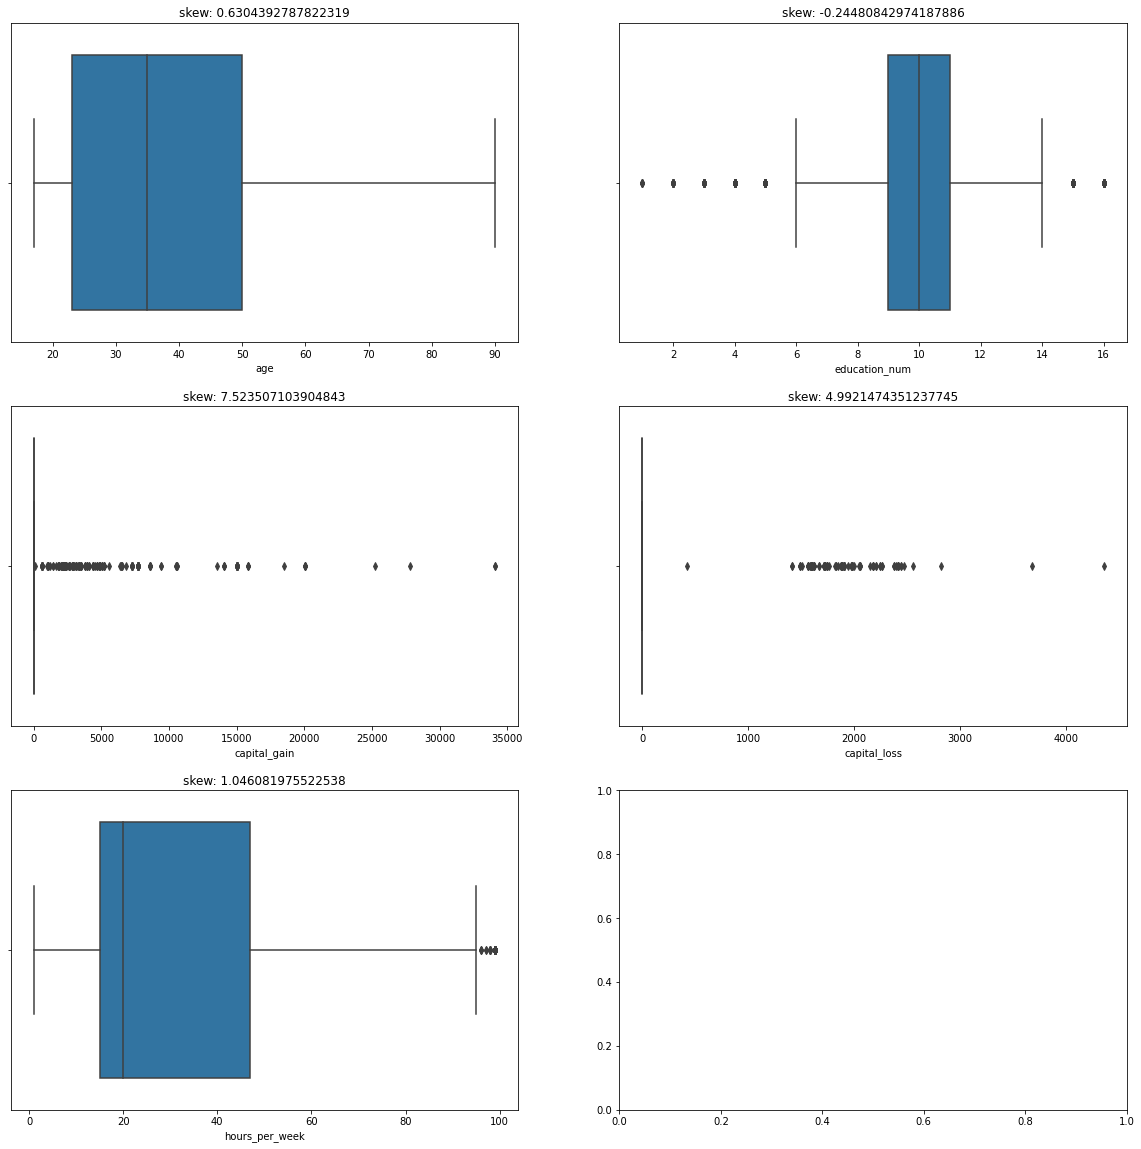

In [40]:
cols_name = ['age','education_num','capital_gain','capital_loss','hours_per_week']

fig, ax = plt.subplots(ncols=2,nrows=3, figsize=[20,20])
ax = ax.flatten()

for idx, col in enumerate(num_col):
    sns.boxplot(df_eda[col], ax=ax[idx])
    ax[idx].set_title(f'skew: {df_eda[col].skew()}')

plt.show()

> Berdasarkan hasil di atas diketahui disitribusi disetiap kolom data numerik, yang mana dilihat dari nilai skewnya kolom education_num merupakan kolom yang memiliki distribusi normal dikarnakan nilai skew berada pada interval nilai -0.5 sampai 0.5. Sedangkan kolom yang lainnya memiliki skew yang tidak berada pada interval nilai -0.5 sampai 0.5 yang dapat diartikan tidak berdistribusi normal.

> Dari hasil diatas juga, berdasarkat grafik boxplot di setiap kolom hampir memiliki outlier, akan tetapi outlier tidak bisa ditentukan hanya berdasarkan visual aja, tapi harus di lihat berdasarkan z score atau iqr

In [41]:
def outlier_analysis(df_eda,col):
  skewness = df_eda[col].skew()
  if skewness>=-0.5 and skewness<=0.5:
    upper = df_eda[col].mean() + 3*df_eda[col].std()
    lower = df_eda[col].mean() - 3*df_eda[col].std()
  else:
    Q1 = df_eda[col].quantile(0.25)
    Q3 = df_eda[col].quantile(0.75)
    IQR = Q3 - Q1

    upper = Q3 + (3 * IQR)
    lower = Q1 - (3 * IQR)
    
  no_outliers = df_eda[(df_eda[col]>=lower) &  (df_eda[col]<=upper)]
  outliers = df_eda[(df_eda[col]<lower) | (df_eda[col]>upper)]

  return outliers,no_outliers, upper, lower

cols_name = ['age','education_num','capital_gain','capital_loss','hours_per_week']

for i in cols_name:
    out,no_out, up, low = outlier_analysis (df_eda,i)
    print(i)
    print('count of outlier: ', len(out))
    print('percentage of outlier: ', (len(out)/len(df_eda))*100, '%') 
    print('-'*10)

age
count of outlier:  0
percentage of outlier:  0.0 %
----------
education_num
count of outlier:  24
percentage of outlier:  0.82930200414651 %
----------
capital_gain
count of outlier:  205
percentage of outlier:  7.083621285418107 %
----------
capital_loss
count of outlier:  123
percentage of outlier:  4.250172771250864 %
----------
hours_per_week
count of outlier:  0
percentage of outlier:  0.0 %
----------


> Code diatas merupakan code untuk melihat outlier disetiap kolom numerik berdasarkan skew disetiap kolomnya, yang mana pada education_num, capital_gain dan capital_loss terdapat oulier yaitu sebanyak masing 0.82%, 7.08% dan 4.25%. Disini saya akan melalukan handling outlier dengan cara drop outlier yang kurang dari 1%

In [42]:
df_eda_cleaned = df_eda.copy()
cols= ['age','education_num','capital_gain','capital_loss','hours_per_week']

for col in cols:
  out,no_out, up, low = outlier_analysis(df_eda_cleaned,col)
  pct_out = (len(out)/len(df_eda))*100

  if pct_out <= 1:
    df_eda_cleaned = df_eda_cleaned[(df_eda_cleaned[col]>=low) & (df_eda_cleaned[col]<=up)]
  else:
    df_eda_cleaned[col] = df_eda_cleaned[col].apply(lambda x: x)

print(f"Jumlah data train sebelum outlier handling: {len(df_eda)}") 
print(f"Jumlah data train setelah outlier handling: {len(df_eda_cleaned)}")

Jumlah data train sebelum outlier handling: 2894
Jumlah data train setelah outlier handling: 2870


> Proses di atas merupakan handling oulier dengan cara drop, yang mana kolom numerik yang memiliki outlier 1% akan didrop.

In [43]:
df_eda.shape

(2894, 14)

In [44]:
df_eda_cleaned.shape

(2870, 14)

In [45]:
# Compare before and after outlier handling
print('before handling: \n', df_eda.describe())

before handling: 
            age  education_num  capital_gain  capital_loss  hours_per_week
count 2894.000       2894.000      2894.000      2894.000        2894.000
mean    38.377          9.793       443.613        80.815          33.058
std     17.130          2.591      2231.316       393.293          24.516
min     17.000          1.000         0.000         0.000           1.000
25%     23.000          9.000         0.000         0.000          15.000
50%     35.000         10.000         0.000         0.000          20.000
75%     50.000         11.000         0.000         0.000          47.000
max     90.000         16.000     34095.000      4356.000          99.000


In [46]:
print('after handling: \n', df_eda_cleaned.describe())

after handling: 
            age  education_num  capital_gain  capital_loss  hours_per_week
count 2870.000       2870.000      2870.000      2870.000        2870.000
mean    38.276          9.860       443.925        80.732          33.015
std     17.109          2.494      2236.002       392.921          24.492
min     17.000          3.000         0.000         0.000           1.000
25%     23.000          9.000         0.000         0.000          15.000
50%     35.000         10.000         0.000         0.000          20.000
75%     50.000         11.000         0.000         0.000          47.000
max     90.000         16.000     34095.000      4356.000          99.000


> Sehingga jika dilihat perbedaannya pada dataset sebelum dan sesudah dihandling memiliki perbedaan. Pada hasil describe diatas pada kolom education_num memiliki perbedaan antara sebelum dan sesudah handling outlier 

### **Categorical Feature**

In [47]:
df_cat = df_eda_cleaned[cat_col]

In [48]:
df_cat.head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income_bracket
641,Private,Some-college,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,<=50K
1276,Private,HS-grad,Widowed,Prof-specialty,Not-in-family,White,Female,United-States,<=50K
2058,Private,7th-8th,Never-married,Machine-op-inspct,Own-child,White,Female,United-States,<=50K
1269,State-gov,Some-college,Separated,Prof-specialty,Unmarried,Black,Female,United-States,<=50K
1420,Self-emp-not-inc,Masters,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,>50K


In [49]:
df_cat.shape

(2870, 9)

In [50]:
for i in df_cat.columns.tolist():
    print(f'num of unique label in {i}: ', len(df_cat[i].unique()))

num of unique label in workclass:  7
num of unique label in education:  14
num of unique label in marital_status:  7
num of unique label in occupation:  13
num of unique label in relationship:  6
num of unique label in race:  5
num of unique label in sex:  2
num of unique label in native_country:  36
num of unique label in income_bracket:  2


In [51]:
# categorical overview
for i in cat_col:
    print(i)
    print()
    print(df_cat[i].value_counts())
    print('-' * 10)

workclass

Private             2010
Self-emp-not-inc     327
Local-gov            202
State-gov            179
Self-emp-inc          97
Federal-gov           53
Without-pay            2
Name: workclass, dtype: int64
----------
education

HS-grad         811
Some-college    777
Bachelors       384
11th            196
Masters         124
10th            108
Assoc-acdm       93
Assoc-voc        93
7th-8th          71
12th             54
Prof-school      53
9th              49
Doctorate        32
5th-6th          25
Name: education, dtype: int64
----------
marital_status

Never-married            1218
Married-civ-spouse       1011
Divorced                  342
Widowed                   173
Separated                  87
Married-spouse-absent      36
Married-AF-spouse           3
Name: marital_status, dtype: int64
----------
occupation

Other-service        540
Adm-clerical         426
Sales                418
Prof-specialty       399
Exec-managerial      246
Craft-repair         210
Transpo

Berdasarkan output diatas akan ditentukan beberapa proses yang akan dilakukan pada setiap kolom kategorik, berikut yang akan dilakukan:

1. Pada kolom `workclass` terdapat 7 label, dan akan mengambil 5 label teratas dengan menggabungkan label `Federal-gov` dan `Without-pay` kedalam label `Self-emp-inc`
2. Pada kolom `education` terdapat 14 label, berdasakan hasil output diatas terdapat 3 label yang dominan dari pada label lainnya, sehingga pada proses selanjutnya akan diambil 3 label dan menamakan label lainnya dengan label Other
3. Pada kolom `marital_status` terdapat 7 label, berdasakan hasil output diatas terdapat 2 label yang dominan dari pada label lainnya, sehingga pada proses selanjutnya akan diambil 2 label dan menamakan label lainnya dengan label Other
4. Pada kolom `occupation` terdiri dari 13 label, berdasakan hasil output diatas terdapat 4 label yang dominan dari pada label lainnya, sehingga pada proses selanjutnya akan diambil 4 label dan menamakan label lainnya dengan label Other
5. Pada kolom `relationship` terdapat 6 label dan akan mengambil 4 label teratas dengan menggabungkan label `Other-relative` dan `Wife` kedalam label `Unmarried`
6. Pada kolom `race` terdapat 5 label dan akan mengambil 2 label teratas dengan menggabungkan label `Asian-Pac-Islander`,`Amer-Indian-Eskimo` dan  `Other` kedalam label `Black` yang nantinya akan diperlakukan sebagai data ordinal dengan peringkatan `Black`,`White`
7. Pada kolom `sex` dan `income_bracket` akan diperlakukan sebagai data ordinal dengan peringkat `Male`,`Female` dan `<=50K`,`>50K`
8. Pada kolom `native_country` akan dikelompokkan berdasarkan benua

Proses diatas akan dilakukan pada tahap feature engineering.

#### **Feature Engineering**

**FE: workclass**

In [52]:
df_cat['workclass'] = df_cat['workclass'].replace({'Federal-gov':'Self-emp-inc', 'Without-pay':'Self-emp-inc'})
df_cat['workclass'].value_counts()

Private             2010
Self-emp-not-inc     327
Local-gov            202
State-gov            179
Self-emp-inc         152
Name: workclass, dtype: int64

**FE: education**

In [53]:
retain_education = df_cat['education'].value_counts().head(3).index.tolist().copy()
retain_education

education_manipulated = []

for i in df_cat['education']:
    if i in retain_education:
        education_manipulated.append(i)
    else:
        education_manipulated.append('Others')

df_cat['education_2'] = education_manipulated.copy()

In [54]:
df_cat['education_2'].unique()

array(['Some-college', 'HS-grad', 'Others', 'Bachelors'], dtype=object)

**FE: marital_status**

In [55]:
retain_marital_status = df_cat['marital_status'].value_counts().head(2).index.tolist().copy()
retain_marital_status

marital_status_manipulated = []

for i in df_cat['marital_status']:
    if i in retain_marital_status:
        marital_status_manipulated.append(i)
    else:
        marital_status_manipulated.append('Others')

df_cat['marital_status_2'] = marital_status_manipulated.copy()

In [56]:
df_cat['marital_status_2'].unique()

array(['Married-civ-spouse', 'Others', 'Never-married'], dtype=object)

**FE: occupation**

In [57]:
retain_occupation = df_cat['occupation'].value_counts().head(2).index.tolist().copy()
retain_occupation

occupation_manipulated = []

for i in df_cat['occupation']:
    if i in retain_occupation:
        occupation_manipulated.append(i)
    else:
        occupation_manipulated.append('Others')

df_cat['occupation_2'] = occupation_manipulated.copy()

In [58]:
df_cat['occupation_2'].unique()

array(['Others', 'Adm-clerical', 'Other-service'], dtype=object)

**FE: relationship**

In [59]:
df_cat['relationship'] = df_cat['relationship'].replace({'Other-relative':'Unmarried', 'Wife':'Unmarried'})
df_cat['relationship'].value_counts()

Husband          832
Own-child        769
Not-in-family    715
Unmarried        554
Name: relationship, dtype: int64

**FE: race**

In [60]:
df_cat['race'] = df_cat['race'].replace({'Asian-Pac-Islander':'Black', 'Amer-Indian-Eskimo':'Black','Other':'Black'})
df_cat['race'].value_counts()

White    2479
Black     391
Name: race, dtype: int64

**FE: native_country**

In [61]:
native_continent = []

for idx, loc in enumerate (df_cat['native_country']):
    if loc in ['United-States','Mexico','Canada','Cuba','Puerto-Rico','El-Salvador','Dominican-Republic',
               'Haiti','Jamaica','Nicaragua','Honduras','Ecuador','Columbia','Outlying-US(Guam-USVI-etc)',
               'Guatemala','Peru','Trinadad&Tobago']:
        native_continent.append('Amerika')
    elif loc in ['Philippines','India','South','Taiwan','China','Japan','Vietnam','Thailand','Iran','Laos','Hong']:
        native_continent.append('Asia')
    else:
        native_continent.append('Eropa')

df_cat['native_continent'] = native_continent

In [62]:
df_cat['native_continent'].unique()

array(['Amerika', 'Eropa', 'Asia'], dtype=object)

In [63]:
list_cat = ['workclass','relationship','race','sex','income_bracket','education_2','marital_status_2','occupation_2','native_continent']
df_cat[list_cat].head(2)

,workclass,relationship,race,sex,income_bracket,education_2,marital_status_2,occupation_2,native_continent
641,Private,Husband,White,Male,<=50K,Some-college,Married-civ-spouse,Others,Amerika
1276,Private,Not-in-family,White,Female,<=50K,HS-grad,Others,Others,Amerika


> Tahapan diatas merupakan tahapan feature engineering terhadap kolom data kategorik `workclass`, `education`, `marital_status`, `occupation`, `relationship`, `race` dan `native_country`

#### **One Hot Encoding**

> Untuk kolom data kategorik `workclass` , `education_2`,`marital_status_2`, `occupation_2`, `relationship` dan `native_continent` akan dilakukan encoding dengan metode One Hot Encoding. Berikut proses encodingnya:

In [64]:
ohe_enc = OneHotEncoder(sparse=False, handle_unknown='ignore')

cat_ohe = pd.DataFrame(ohe_enc.fit_transform(df_cat[['workclass', 'marital_status_2', 'occupation_2','education_2','relationship','native_continent']]))
cat_ohe.columns = ohe_enc.get_feature_names(['workclass', 'marital_status_2', 'occupation_2','education_2','relationship','native_continent'])

review = pd.concat([df_cat[['workclass', 'marital_status_2', 'occupation_2','education_2','relationship','native_continent']].reset_index(drop=True), cat_ohe], axis=1)
review

,workclass,marital_status_2,occupation_2,education_2,relationship,native_continent,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,marital_status_2_Married-civ-spouse,marital_status_2_Never-married,marital_status_2_Others,occupation_2_Adm-clerical,occupation_2_Other-service,occupation_2_Others,education_2_Bachelors,education_2_HS-grad,education_2_Others,education_2_Some-college,relationship_Husband,relationship_Not-in-family,relationship_Own-child,relationship_Unmarried,native_continent_Amerika,native_continent_Asia,native_continent_Eropa
0,Private,Married-civ-spouse,Others,Some-college,Husband,Amerika,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000
1,Private,Others,Others,HS-grad,Not-in-family,Amerika,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000
2,Private,Never-married,Others,Others,Own-child,Amerika,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000
3,State-gov,Others,Others,Some-college,Unmarried,Amerika,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000
4,Self-emp-not-inc,Married-civ-spouse,Others,Others,Husband,Amerika,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2865,Private,Never-married,Other-service,Others,Own-child,Amerika,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000
2866,Self-emp-not-inc,Married-civ-spouse,Other-service,HS-grad,Unmarried,Asia,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000
2867,Self-emp-not-inc,Married-civ-spouse,Others,Some-college,Husband,Amerika,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000
2868,State-gov,Never-married,Other-service,Some-college,Own-child,Amerika,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000


> Dikarnakan terlalu banyak kolom dummy yang terbentuk, maka dilakukan pembagian kolom menjadi 2 bagian, guna mempermudah melakukan feature selection dengan menggunakan heatmap

In [65]:
cat_ohe_1 = cat_ohe.iloc[:,:11]
cat_ohe_1.head()

,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,marital_status_2_Married-civ-spouse,marital_status_2_Never-married,marital_status_2_Others,occupation_2_Adm-clerical,occupation_2_Other-service,occupation_2_Others
0,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000
1,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000
2,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000
3,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000
4,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000


In [66]:
cat_ohe_2 = cat_ohe.iloc[:,11:22]
cat_ohe_2.head()

,education_2_Bachelors,education_2_HS-grad,education_2_Others,education_2_Some-college,relationship_Husband,relationship_Not-in-family,relationship_Own-child,relationship_Unmarried,native_continent_Amerika,native_continent_Asia,native_continent_Eropa
0,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000
1,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000
2,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000
3,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000
4,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000


#### **Ordinal Encoder**

> Untuk kolom data kategorik `race` , `sex` dan `income_bracket` akan dilakukan encoding dengan metode Ordinal Encoding. Berikut proses encodingnya:

In [67]:
for i in ['race', 'sex', 'income_bracket']:
    print(df_cat[i].value_counts())
    print('-'*30)

White    2479
Black     391
Name: race, dtype: int64
------------------------------
Male      1585
Female    1285
Name: sex, dtype: int64
------------------------------
<=50K    2400
>50K      470
Name: income_bracket, dtype: int64
------------------------------


In [68]:
race_cat = ['Black', 'White']
sex_cat = ['Male', 'Female']
income_cat = ['<=50K', '>50K',]

ord_enc = OrdinalEncoder(categories=[race_cat, sex_cat, income_cat])
cat_ord = pd.DataFrame(ord_enc.fit_transform(df_cat[['race', 'sex', 'income_bracket']]))

cat_ord.columns = ['race', 'sex', 'income_bracket']
review = pd.concat([df_cat[['race', 'sex', 'income_bracket']].reset_index(drop=True), cat_ord], axis=1)

review

,race,sex,income_bracket,race,sex,income_bracket
0,White,Male,<=50K,1.000,0.000,0.000
1,White,Female,<=50K,1.000,1.000,0.000
2,White,Female,<=50K,1.000,1.000,0.000
3,Black,Female,<=50K,0.000,1.000,0.000
4,White,Male,>50K,1.000,0.000,1.000
...,...,...,...,...,...,...
2865,White,Male,<=50K,1.000,0.000,0.000
2866,Black,Female,<=50K,0.000,1.000,0.000
2867,White,Male,<=50K,1.000,0.000,0.000
2868,White,Female,<=50K,1.000,1.000,0.000


In [69]:
cat_ord.head()

,race,sex,income_bracket
0,1.000,0.000,0.000
1,1.000,1.000,0.000
2,1.000,1.000,0.000
3,0.000,1.000,0.000
4,1.000,0.000,1.000


### **Feature Selection**

> Pada Feature Selection akan ditentukan kolom mana saja yang nantinya digunakan untuk proses modeling lebih lanjut dan pada tahapan ini akan menggunakan correlation dengan heatmap untuk menentukan kolom yang dipilih

**Feature Selection untuk data feature numerik dengan menggunakan Correlation**

In [70]:
df_num = pd.concat([df_eda_cleaned[num_col].reset_index(drop=True),cat_ord['income_bracket']],axis=1)
df_num

,age,education_num,capital_gain,capital_loss,hours_per_week,income_bracket
0,36,10,0.000,0,56,0.000
1,57,9,0.000,0,57,0.000
2,20,4,0.000,0,52,0.000
3,39,10,0.000,0,37,0.000
4,70,14,0.000,2246,8,1.000
...,...,...,...,...,...,...
2865,18,6,0.000,0,6,0.000
2866,36,9,0.000,0,20,0.000
2867,26,10,0.000,0,78,0.000
2868,22,10,0.000,0,15,0.000


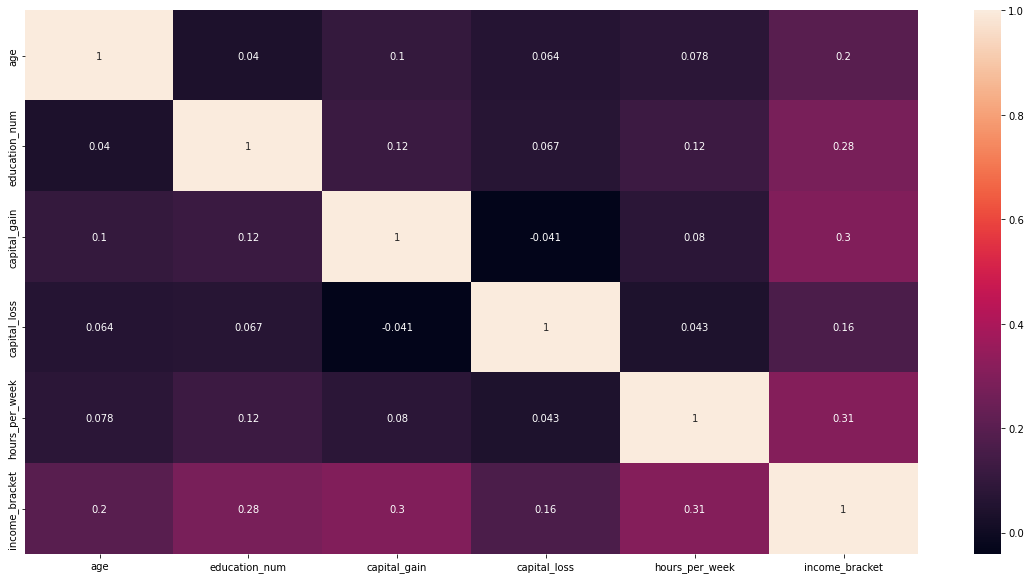

In [71]:
fig,ax = plt.subplots(figsize=[20,10])

corr = df_num.corr()

ax = sns.heatmap(corr,annot=True)
plt.show()

**Feature Selection untuk data feature kategorik dengan menggunakan Correlation**

In [72]:
df_cat_ohe_1 = pd.concat([cat_ohe_1.reset_index(drop=True),cat_ord['income_bracket']],axis=1)
df_cat_ohe_1.head()

,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,marital_status_2_Married-civ-spouse,marital_status_2_Never-married,marital_status_2_Others,occupation_2_Adm-clerical,occupation_2_Other-service,occupation_2_Others,income_bracket
0,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000
1,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000
2,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000
3,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000
4,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000


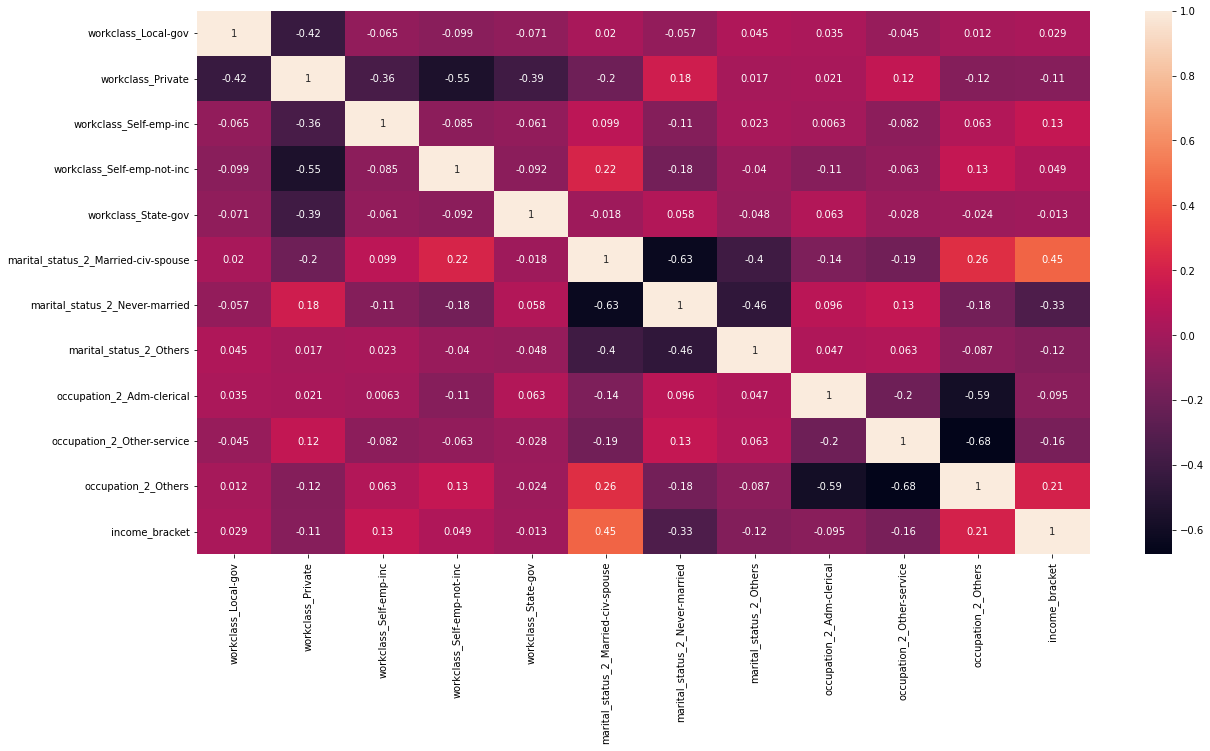

In [73]:
fig,ax = plt.subplots(figsize=[20,10])

corr = df_cat_ohe_1.corr()

ax = sns.heatmap(corr,annot=True)
plt.show()

In [74]:
df_cat_ohe_2 = pd.concat([cat_ohe_2.reset_index(drop=True),cat_ord['income_bracket']],axis=1)
df_cat_ohe_2.head()

,education_2_Bachelors,education_2_HS-grad,education_2_Others,education_2_Some-college,relationship_Husband,relationship_Not-in-family,relationship_Own-child,relationship_Unmarried,native_continent_Amerika,native_continent_Asia,native_continent_Eropa,income_bracket
0,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000
1,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000
2,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000
3,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000
4,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000


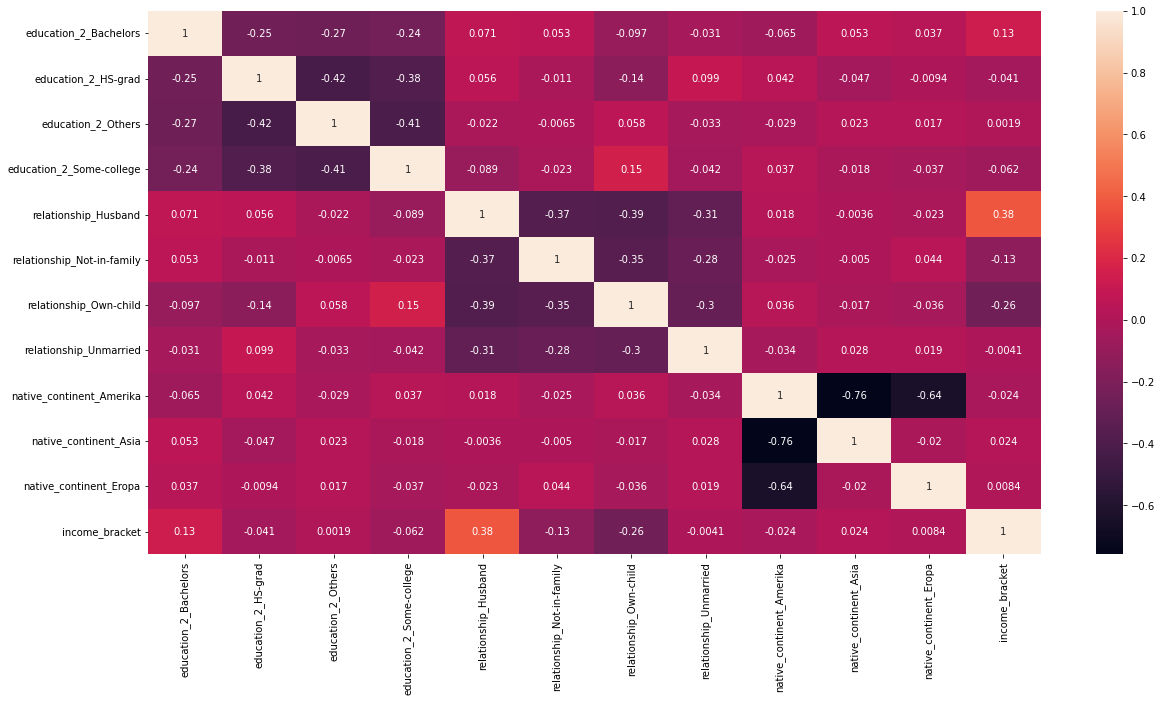

In [75]:
fig,ax = plt.subplots(figsize=[20,10])

corr = df_cat_ohe_2.corr()

ax = sns.heatmap(corr,annot=True)
plt.show()

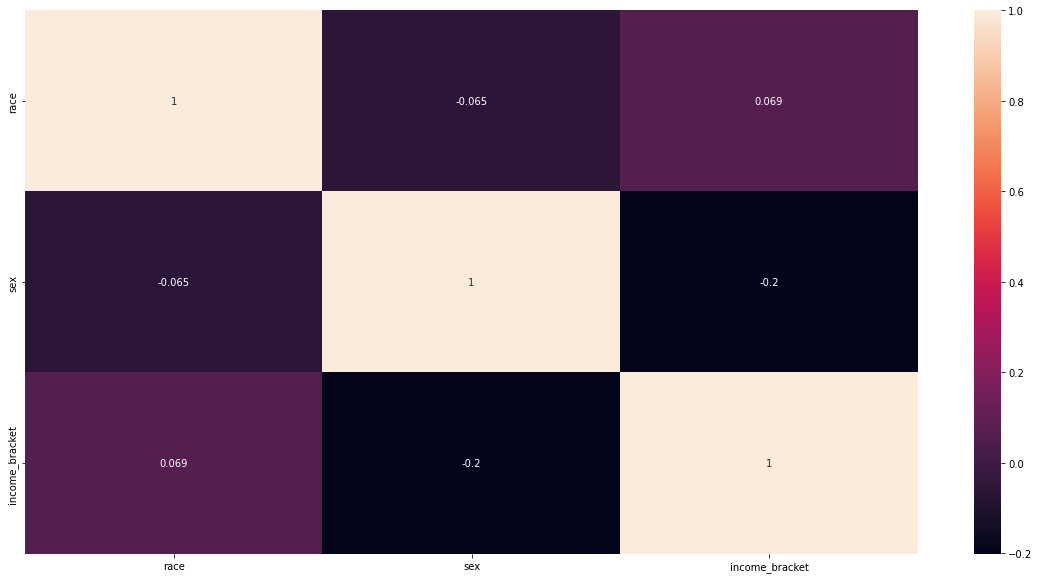

In [76]:
fig,ax = plt.subplots(figsize=[20,10])

corr = cat_ord.corr()

ax = sns.heatmap(corr,annot=True)
plt.show()

> Dari hasil correlation diatas, saya menetapkan untuk mengambil kolom yang memiliki nilai correlation lebih dari sama dengan 0.2, sehingga berdasarkan hasil correlation diatas diperoleh kolom feature sebagai berikut: `age`, `education_num`, `capital_gain`,`hours_per_week`,`marital_status_2_Married-civ-spouse`, `marital_status_2_Never-married`,`occupation_2_Others`,`relationship_Husband`,`relationship_Own-child`,`sex`,`income_bracket`

**Combine Numerical and Categorical data after processed**

In [77]:
df_eda_cleaned = pd.concat([df_eda_cleaned[num_col].reset_index(drop=True),cat_ohe_1,cat_ohe_2,cat_ord],axis=1)
df_eda_cleaned.head()

,age,education_num,capital_gain,capital_loss,hours_per_week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,marital_status_2_Married-civ-spouse,marital_status_2_Never-married,marital_status_2_Others,occupation_2_Adm-clerical,occupation_2_Other-service,occupation_2_Others,education_2_Bachelors,education_2_HS-grad,education_2_Others,education_2_Some-college,relationship_Husband,relationship_Not-in-family,relationship_Own-child,relationship_Unmarried,native_continent_Amerika,native_continent_Asia,native_continent_Eropa,race,sex,income_bracket
0,36,10,0.000,0,56,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000
1,57,9,0.000,0,57,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,1.000,0.000
2,20,4,0.000,0,52,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,1.000,0.000
3,39,10,0.000,0,37,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000
4,70,14,0.000,2246,8,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000


In [78]:
df_eda_cleaned[['age', 'education_num', 'capital_gain','hours_per_week','marital_status_2_Married-civ-spouse',
               'marital_status_2_Never-married','occupation_2_Others','relationship_Husband','relationship_Own-child',
               'sex','income_bracket']]

,age,education_num,capital_gain,hours_per_week,marital_status_2_Married-civ-spouse,marital_status_2_Never-married,occupation_2_Others,relationship_Husband,relationship_Own-child,sex,income_bracket
0,36,10,0.000,56,1.000,0.000,1.000,1.000,0.000,0.000,0.000
1,57,9,0.000,57,0.000,0.000,1.000,0.000,0.000,1.000,0.000
2,20,4,0.000,52,0.000,1.000,1.000,0.000,1.000,1.000,0.000
3,39,10,0.000,37,0.000,0.000,1.000,0.000,0.000,1.000,0.000
4,70,14,0.000,8,1.000,0.000,1.000,1.000,0.000,0.000,1.000
...,...,...,...,...,...,...,...,...,...,...,...
2865,18,6,0.000,6,0.000,1.000,0.000,0.000,1.000,0.000,0.000
2866,36,9,0.000,20,1.000,0.000,0.000,0.000,0.000,1.000,0.000
2867,26,10,0.000,78,1.000,0.000,1.000,1.000,0.000,0.000,0.000
2868,22,10,0.000,15,0.000,1.000,0.000,0.000,1.000,1.000,0.000


### **Feature Scaling**

> Setelah melakukan fature selection dengan corelation menggunakan heatmap, selanjutnya akan dilakukan feature scaling terhadap data numerik, disini saya menggunakan StandardScaler untuk proses scaling

In [79]:
num_col = ['age', 'education_num', 'capital_gain','hours_per_week']
scaler = StandardScaler()

num_scaled = pd.DataFrame(scaler.fit_transform(df_eda_cleaned[num_col]))
num_scaled.columns = num_col

df_eda_cleaned.drop(num_col, axis=1, inplace=True)
df_eda_cleaned = pd.concat([df_eda_cleaned, num_scaled], axis=1)

df_eda_cleaned = df_eda_cleaned[['age', 'education_num', 'capital_gain','hours_per_week','marital_status_2_Married-civ-spouse',
               'marital_status_2_Never-married','occupation_2_Others','relationship_Husband','relationship_Own-child',
               'sex','income_bracket']]

df_eda_cleaned

,age,education_num,capital_gain,hours_per_week,marital_status_2_Married-civ-spouse,marital_status_2_Never-married,occupation_2_Others,relationship_Husband,relationship_Own-child,sex,income_bracket
0,-0.133,0.056,-0.199,0.939,1.000,0.000,1.000,1.000,0.000,0.000,0.000
1,1.095,-0.345,-0.199,0.980,0.000,0.000,1.000,0.000,0.000,1.000,0.000
2,-1.068,-2.350,-0.199,0.775,0.000,1.000,1.000,0.000,1.000,1.000,0.000
3,0.042,0.056,-0.199,0.163,0.000,0.000,1.000,0.000,0.000,1.000,0.000
4,1.855,1.660,-0.199,-1.022,1.000,0.000,1.000,1.000,0.000,0.000,1.000
...,...,...,...,...,...,...,...,...,...,...,...
2865,-1.185,-1.548,-0.199,-1.103,0.000,1.000,0.000,0.000,1.000,0.000,0.000
2866,-0.133,-0.345,-0.199,-0.531,1.000,0.000,0.000,0.000,0.000,1.000,0.000
2867,-0.718,0.056,-0.199,1.837,1.000,0.000,1.000,1.000,0.000,0.000,0.000
2868,-0.951,0.056,-0.199,-0.736,0.000,1.000,0.000,0.000,1.000,1.000,0.000


Dari tahapan EDA-Modeling dapat direkap tahapan - tahapan yang dilakukan yang nantinya akan menjadi acuan dalam menentukan proses data preprocessing.

1. Menghapus outlier pada kolom `education_num`
2. Melakukan feature engineering terhadap kolom data kategorik `workclass`, `education`, `marital_status`, `occupation`, `relationship`, `race` dan `native_country`
3. Melakukan metode One Hot Encoding untuk kolom data kategorik `workclass` , `education_2`,`marital_status_2`, `occupation_2`, `relationship` dan `native_continent`
4. Melakukan metode Ordinal Encoding terhadap kolom data kategorik `race` , `sex` dan `income_bracket`
5. Melakukan Feature Selection dengan melihat nilai Correlation menggunakan heatmap dan diperoleh kolom feature sebagai berikut: `age`, `education_num`, `capital_gain`,`hours_per_week`,`marital_status_2_Married-civ-spouse`, `marital_status_2_Never-married`,`occupation_2_Others`,`relationship_Husband`,`relationship_Own-child`,`sex`,`income_bracket`
6. Melakukan Feature Scaling pada kolom feature numerik


## **6.2 Data Preprocessing**

Pada Data Preprocessing akan dilakukan tahapan - tahapan yang sama pada EDA - Modeling, hanya saja pada Data Preprocessing tidak melakukan penghapusan terhadapat outlier, sehingga pada Data Preprocessing akan melakukan tahapan sebagai berikut:
1. Melakukan feature engineering terhadap kolom data kategorik `workclass`, `education`, `marital_status`, `occupation`, `relationship`, `race` dan `native_country`
2. Melakukan metode One Hot Encoding untuk kolom data kategorik `workclass` , `education_2`,`marital_status_2`, `occupation_2`, `relationship` dan `native_continent`
3. Melakukan metode Ordinal Encoding terhadap kolom data kategorik `race` , `sex` dan `income_bracket`
4. Melakukan Feature Selection dengan melihat nilai Correlation menggunakan heatmap dan diperoleh kolom feature sebagai berikut: `age`, `education_num`, `capital_gain`,`hours_per_week`,`marital_status_2_Married-civ-spouse`, `marital_status_2_Never-married`,`occupation_2_Others`,`relationship_Husband`,`relationship_Own-child`,`sex`,`income_bracket`
5. Melakukan Feature Scaling pada kolom feature numerik

In [80]:
testing = pd.concat([X_test, y_test], axis=1)
testing.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
227,47,Private,HS-grad,9,Separated,Sales,Not-in-family,White,Female,0.000,0,52,United-States,<=50K
2291,19,Private,11th,7,Never-married,Transport-moving,Other-relative,White,Male,0.000,0,10,United-States,<=50K
3304,17,Private,11th,7,Never-married,Other-service,Own-child,White,Male,0.000,0,20,United-States,<=50K
2161,30,Private,Bachelors,13,Never-married,Craft-repair,Own-child,White,Male,0.000,0,10,United-States,<=50K
2545,17,Private,11th,7,Never-married,Craft-repair,Own-child,White,Female,0.000,0,15,United-States,<=50K


In [81]:
num_target = num_col

print(num_target)
print(cat_col)

['age', 'education_num', 'capital_gain', 'hours_per_week']
['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income_bracket']


### **Feature Engineering**

**FE: workclass**

In [82]:
testing['workclass'] = testing['workclass'].replace({'Federal-gov':'Self-emp-inc', 'Without-pay':'Self-emp-inc'})
testing['workclass'].value_counts()

Private             522
Self-emp-not-inc     86
Local-gov            45
State-gov            41
Self-emp-inc         30
Name: workclass, dtype: int64

**FE: education**

In [83]:
retain_education = testing['education'].value_counts().head(3).index.tolist().copy()
retain_education

education_manipulated = []

for i in testing['education']:
    if i in retain_education:
        education_manipulated.append(i)
    else:
        education_manipulated.append('Others')

testing['education_2'] = education_manipulated.copy()

In [84]:
testing['education_2'].unique()

array(['HS-grad', 'Others', 'Bachelors', 'Some-college'], dtype=object)

**FE: marital_status**

In [85]:
retain_marital_status = testing['marital_status'].value_counts().head(2).index.tolist().copy()
retain_marital_status

marital_status_manipulated = []

for i in testing['marital_status']:
    if i in retain_marital_status:
        marital_status_manipulated.append(i)
    else:
        marital_status_manipulated.append('Others')

testing['marital_status_2'] = marital_status_manipulated.copy()

In [86]:
testing['marital_status_2'].unique()

array(['Others', 'Never-married', 'Married-civ-spouse'], dtype=object)

**FE: occupation**

In [87]:
retain_occupation = testing['occupation'].value_counts().head(2).index.tolist().copy()
retain_occupation

occupation_manipulated = []

for i in testing['occupation']:
    if i in retain_occupation:
        occupation_manipulated.append(i)
    else:
        occupation_manipulated.append('Others')

testing['occupation_2'] = occupation_manipulated.copy()

In [88]:
testing['occupation_2'].unique()

array(['Sales', 'Others', 'Other-service'], dtype=object)

**FE: relationship**

In [89]:
testing['relationship'] = testing['relationship'].replace({'Other-relative':'Unmarried', 'Wife':'Unmarried'})
testing['relationship'].value_counts()

Husband          201
Not-in-family    189
Own-child        180
Unmarried        154
Name: relationship, dtype: int64

**FE: race**

In [90]:
testing['race'] = testing['race'].replace({'Asian-Pac-Islander':'Black', 'Amer-Indian-Eskimo':'Black','Other':'Black'})
testing['race'].value_counts()

White    622
Black    102
Name: race, dtype: int64

**FE: native_country**

In [91]:
native_continent = []

for idx, loc in enumerate (testing['native_country']):
    if loc in ['United-States','Mexico','Canada','Cuba','Puerto-Rico','El-Salvador','Dominican-Republic',
               'Haiti','Jamaica','Nicaragua','Honduras','Ecuador','Columbia','Outlying-US(Guam-USVI-etc)',
               'Guatemala','Peru','Trinadad&Tobago']:
        native_continent.append('Amerika')
    elif loc in ['Philippines','India','South','Taiwan','China','Japan','Vietnam','Thailand','Iran','Laos','Hong']:
        native_continent.append('Asia')
    else:
        native_continent.append('Eropa')

testing['native_continent'] = native_continent

In [92]:
testing['native_continent'].unique()

array(['Amerika', 'Asia', 'Eropa'], dtype=object)

### **One Hot Encoding**

In [93]:
ohe_enc = OneHotEncoder(sparse=False, handle_unknown='ignore')

cat_ohe = pd.DataFrame(ohe_enc.fit_transform(df_cat[['workclass', 'marital_status_2', 'occupation_2','education_2','relationship','native_continent']]))
cat_ohe = pd.DataFrame(ohe_enc.transform(testing[['workclass', 'marital_status_2', 'occupation_2','education_2','relationship','native_continent']]))
cat_ohe.columns = ohe_enc.get_feature_names(['workclass', 'marital_status_2', 'occupation_2','education_2','relationship','native_continent'])

review = pd.concat([testing[['workclass', 'marital_status_2', 'occupation_2','education_2','relationship','native_continent']].reset_index(drop=True), cat_ohe], axis=1)
review

,workclass,marital_status_2,occupation_2,education_2,relationship,native_continent,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,marital_status_2_Married-civ-spouse,marital_status_2_Never-married,marital_status_2_Others,occupation_2_Adm-clerical,occupation_2_Other-service,occupation_2_Others,education_2_Bachelors,education_2_HS-grad,education_2_Others,education_2_Some-college,relationship_Husband,relationship_Not-in-family,relationship_Own-child,relationship_Unmarried,native_continent_Amerika,native_continent_Asia,native_continent_Eropa
0,Private,Others,Sales,HS-grad,Not-in-family,Amerika,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000
1,Private,Never-married,Others,Others,Unmarried,Amerika,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000
2,Private,Never-married,Other-service,Others,Own-child,Amerika,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000
3,Private,Never-married,Others,Bachelors,Own-child,Amerika,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000
4,Private,Never-married,Others,Others,Own-child,Amerika,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719,Private,Never-married,Others,Others,Own-child,Amerika,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000
720,Private,Married-civ-spouse,Sales,Bachelors,Unmarried,Amerika,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000
721,Local-gov,Never-married,Other-service,HS-grad,Own-child,Amerika,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000
722,Private,Others,Others,Some-college,Unmarried,Amerika,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000


### **Ordinal Encoder**

In [94]:
race_cat = ['Black', 'White']
sex_cat = ['Male', 'Female']
income_cat = ['<=50K', '>50K',]

ord_enc = OrdinalEncoder(categories=[race_cat, sex_cat, income_cat])
cat_ord = pd.DataFrame(ord_enc.fit_transform(df_cat[['race', 'sex', 'income_bracket']]))
cat_ord = pd.DataFrame(ord_enc.transform(testing[['race', 'sex', 'income_bracket']]))

cat_ord.columns = ['race', 'sex', 'income_bracket']
review = pd.concat([testing[['race', 'sex', 'income_bracket']].reset_index(drop=True), cat_ord], axis=1)

review

,race,sex,income_bracket,race,sex,income_bracket
0,White,Female,<=50K,1.000,1.000,0.000
1,White,Male,<=50K,1.000,0.000,0.000
2,White,Male,<=50K,1.000,0.000,0.000
3,White,Male,<=50K,1.000,0.000,0.000
4,White,Female,<=50K,1.000,1.000,0.000
...,...,...,...,...,...,...
719,White,Male,<=50K,1.000,0.000,0.000
720,White,Female,>50K,1.000,1.000,1.000
721,White,Female,<=50K,1.000,1.000,0.000
722,White,Female,<=50K,1.000,1.000,0.000


### **Feature Scaling**

In [95]:
testing_cleaned = pd.concat([testing[num_target].reset_index(drop=True), cat_ohe, cat_ord], axis=1)
testing_cleaned = testing_cleaned[['age', 'education_num', 'capital_gain','hours_per_week','marital_status_2_Married-civ-spouse',
               'marital_status_2_Never-married','occupation_2_Others','relationship_Husband','relationship_Own-child',
               'sex','income_bracket']]
testing_cleaned

,age,education_num,capital_gain,hours_per_week,marital_status_2_Married-civ-spouse,marital_status_2_Never-married,occupation_2_Others,relationship_Husband,relationship_Own-child,sex,income_bracket
0,47,9,0.000,52,0.000,0.000,0.000,0.000,0.000,1.000,0.000
1,19,7,0.000,10,0.000,1.000,1.000,0.000,0.000,0.000,0.000
2,17,7,0.000,20,0.000,1.000,0.000,0.000,1.000,0.000,0.000
3,30,13,0.000,10,0.000,1.000,1.000,0.000,1.000,0.000,0.000
4,17,7,0.000,15,0.000,1.000,1.000,0.000,1.000,1.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...
719,18,7,0.000,18,0.000,1.000,1.000,0.000,1.000,0.000,0.000
720,41,13,0.000,12,1.000,0.000,0.000,0.000,0.000,1.000,1.000
721,22,9,0.000,53,0.000,1.000,0.000,0.000,1.000,1.000,0.000
722,42,10,0.000,20,0.000,0.000,1.000,0.000,0.000,1.000,0.000


In [96]:
num_col = ['age', 'education_num', 'capital_gain','hours_per_week']

num_scaled = pd.DataFrame(scaler.transform(testing_cleaned[num_col]))
num_scaled.columns = num_col

testing_cleaned.drop(num_col, axis=1, inplace=True)
testing_cleaned = pd.concat([testing_cleaned, num_scaled], axis=1)

testing_cleaned = testing_cleaned[['age', 'education_num', 'capital_gain','hours_per_week','marital_status_2_Married-civ-spouse',
               'marital_status_2_Never-married','occupation_2_Others','relationship_Husband','relationship_Own-child',
               'sex','income_bracket']]

testing_cleaned

,age,education_num,capital_gain,hours_per_week,marital_status_2_Married-civ-spouse,marital_status_2_Never-married,occupation_2_Others,relationship_Husband,relationship_Own-child,sex,income_bracket
0,0.510,-0.345,-0.199,0.775,0.000,0.000,0.000,0.000,0.000,1.000,0.000
1,-1.127,-1.147,-0.199,-0.940,0.000,1.000,1.000,0.000,0.000,0.000,0.000
2,-1.244,-1.147,-0.199,-0.531,0.000,1.000,0.000,0.000,1.000,0.000,0.000
3,-0.484,1.259,-0.199,-0.940,0.000,1.000,1.000,0.000,1.000,0.000,0.000
4,-1.244,-1.147,-0.199,-0.736,0.000,1.000,1.000,0.000,1.000,1.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...
719,-1.185,-1.147,-0.199,-0.613,0.000,1.000,1.000,0.000,1.000,0.000,0.000
720,0.159,1.259,-0.199,-0.858,1.000,0.000,0.000,0.000,0.000,1.000,1.000
721,-0.951,-0.345,-0.199,0.816,0.000,1.000,0.000,0.000,1.000,1.000,0.000
722,0.218,0.056,-0.199,-0.531,0.000,0.000,1.000,0.000,0.000,1.000,0.000


In [97]:
X_train = df_eda_cleaned.drop('income_bracket',axis=1).copy()
y_train = df_eda_cleaned['income_bracket']

X_test = testing_cleaned.drop('income_bracket',axis=1).copy()
y_test = testing_cleaned['income_bracket']

# **7. Modeling** 

> Setelah melakukan Data Preprocessing, selanjutnya akan dilakukan tahap modeling.

## **7.1. Model Definition**

In [102]:
# Logistic Regression

log_model1 = LogisticRegression(C=1)
log_model2 = LogisticRegression(C=0.5)

In [103]:
# SVM
svm_model1 = SVC(kernel='linear',C=1)
svm_model2 = SVC(kernel='linear',C=0.5)

> Pada tahapan model definisi digunakan 2 model klasifikasi, yaitu model logistic regression dan model SVM, dan setiap model di buat masing - masing 2 model dengan hyperparameter yang berbeda sehingga bisa ditentukan model mana yang terbaik

## **7.2. Model Training**

In [105]:
# Logistic Regression

log_model1.fit(X_train, y_train)

LogisticRegression(C=1)

In [107]:
log_model2.fit(X_train, y_train)

LogisticRegression(C=0.5)

In [108]:
# SVM
svm_model1.fit(X_train,y_train)

SVC(C=1, kernel='linear')

In [109]:
svm_model2.fit(X_train,y_train)

SVC(C=0.5, kernel='linear')

> Proses diatas merupakan model traning disetiap model yang digunakan

## **7.3. Model Evaluation**

> Didefinisikan ulang terkait label pada target yang mana <=50K dilabelkan dengan 0 dan >50K dilabelkan dengan 1. Fokus dalam pemodelan ini ingin menentukan predict yang sesuai terhadap target <=50K atau label 0, karna dapat diartikan <=50K termasuk kategori miskin dan >50K termasuk kategori kaya, sehingga ingin meminimalisir kesalahan pada predict label 0. 

> Dari uraian diatas, pada model evaluasi lebih difokuskan pada precision di kelas 1, karna ingin meminimalisir kesalahan negatif

**Logistic Regression Model 1**

In [129]:
pred_prob = log_model1.predict_proba(X_train)
pred_prob

array([[6.67254214e-01, 3.32745786e-01],
       [9.20306239e-01, 7.96937609e-02],
       [9.99227255e-01, 7.72744509e-04],
       ...,
       [5.83247653e-01, 4.16752347e-01],
       [9.98791952e-01, 1.20804817e-03],
       [9.98836887e-01, 1.16311311e-03]])

In [130]:
y_predLR1_train = log_model1.predict(X_train)
y_predLR1_test = log_model1.predict(X_test)

In [131]:
y_predLR1_train

array([0., 0., 0., ..., 0., 0., 0.])

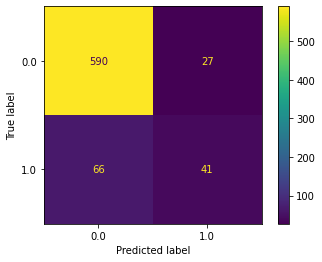

In [132]:
cm = confusion_matrix(y_test, y_predLR1_test, labels=log_model1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log_model1.classes_)

disp.plot()
plt.show()

In [133]:
print(classification_report(y_train,y_predLR1_train))

              precision    recall  f1-score   support

         0.0       0.90      0.96      0.93      2400
         1.0       0.69      0.45      0.54       470

    accuracy                           0.88      2870
   macro avg       0.80      0.70      0.74      2870
weighted avg       0.87      0.88      0.87      2870



In [134]:
print(classification_report(y_test,y_predLR1_test))

              precision    recall  f1-score   support

         0.0       0.90      0.96      0.93       617
         1.0       0.60      0.38      0.47       107

    accuracy                           0.87       724
   macro avg       0.75      0.67      0.70       724
weighted avg       0.86      0.87      0.86       724



**Logistic Regression Model 2**

In [135]:
pred_prob = log_model2.predict_proba(X_train)
pred_prob

array([[0.66565116, 0.33434884],
       [0.91448516, 0.08551484],
       [0.99887507, 0.00112493],
       ...,
       [0.58238366, 0.41761634],
       [0.99820157, 0.00179843],
       [0.99849736, 0.00150264]])

In [136]:
y_predLR2_train = log_model2.predict(X_train)
y_predLR2_test = log_model2.predict(X_test)

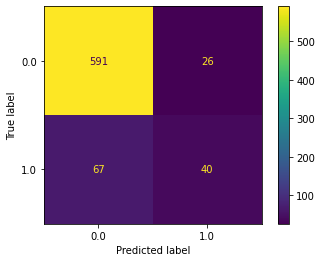

In [137]:
cm = confusion_matrix(y_test, y_predLR2_test, labels=log_model2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log_model2.classes_)

disp.plot()
plt.show()

In [138]:
print(classification_report(y_train,y_predLR2_train))

              precision    recall  f1-score   support

         0.0       0.90      0.96      0.93      2400
         1.0       0.69      0.44      0.54       470

    accuracy                           0.88      2870
   macro avg       0.79      0.70      0.73      2870
weighted avg       0.86      0.88      0.86      2870



In [139]:
print(classification_report(y_test,y_predLR2_test))

              precision    recall  f1-score   support

         0.0       0.90      0.96      0.93       617
         1.0       0.61      0.37      0.46       107

    accuracy                           0.87       724
   macro avg       0.75      0.67      0.69       724
weighted avg       0.86      0.87      0.86       724



> Pada model logistik regresi yang dibuat menjadi 2 model, model LR2 lebih baik daripada model LR1 berdasarkan selisih nilai precisionnya, sehingga akan di ambil model LR2 pada tahap model inference

**SVM Model 1**

In [140]:
y_predSVM1_train = svm_model1.predict(X_train)
y_predSVM1_test = svm_model1.predict(X_test)

In [141]:
y_predSVM1_train

array([0., 0., 0., ..., 0., 0., 0.])

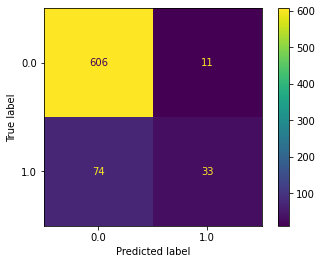

In [142]:
cm = confusion_matrix(y_test, y_predSVM1_test, labels=log_model1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log_model1.classes_)

disp.plot()
plt.show()

In [143]:
print(classification_report(y_train,y_predSVM1_train))

              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93      2400
         1.0       0.75      0.32      0.45       470

    accuracy                           0.87      2870
   macro avg       0.82      0.65      0.69      2870
weighted avg       0.86      0.87      0.85      2870



In [144]:
print(classification_report(y_test,y_predSVM1_test))

              precision    recall  f1-score   support

         0.0       0.89      0.98      0.93       617
         1.0       0.75      0.31      0.44       107

    accuracy                           0.88       724
   macro avg       0.82      0.65      0.69       724
weighted avg       0.87      0.88      0.86       724



**SVM Model 2**

In [145]:
y_predSVM2_train = svm_model2.predict(X_train)
y_predSVM2_test = svm_model2.predict(X_test)

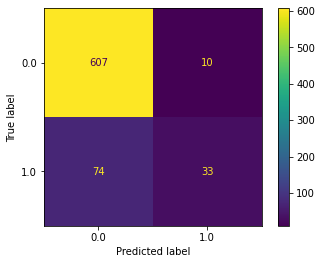

In [146]:
cm = confusion_matrix(y_test, y_predSVM2_test, labels=log_model2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log_model2.classes_)

disp.plot()
plt.show()

In [147]:
print(classification_report(y_train,y_predSVM2_train))

              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93      2400
         1.0       0.75      0.32      0.45       470

    accuracy                           0.87      2870
   macro avg       0.82      0.65      0.69      2870
weighted avg       0.86      0.87      0.85      2870



In [148]:
print(classification_report(y_test,y_predSVM2_test))

              precision    recall  f1-score   support

         0.0       0.89      0.98      0.94       617
         1.0       0.77      0.31      0.44       107

    accuracy                           0.88       724
   macro avg       0.83      0.65      0.69       724
weighted avg       0.87      0.88      0.86       724



> Pada model svm yang dibuat menjadi 2 model, model svm1 lebih baik daripada model svm2 berdasarkan selisih nilai precisionnya, sehingga akan di ambil model svm1 pada tahap model inference

# **8. Model Inference**

In [149]:
inf = df_inf
inf

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,67,Private,HS-grad,9,Widowed,Sales,Not-in-family,White,Female,991.000,0,18,United-States,<=50K
1,66,Private,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0.000,0,10,United-States,<=50K
2,39,Private,Some-college,10,Separated,Other-service,Unmarried,White,Female,0.000,0,75,United-States,<=50K
3,58,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.000,0,72,United-States,<=50K
4,22,Private,10th,6,Never-married,Craft-repair,Own-child,White,Male,0.000,0,15,United-States,<=50K


### **Feature Engineering**

**FE: workclass**

In [150]:
inf['workclass'] = inf['workclass'].replace({'Federal-gov':'Self-emp-inc', 'Without-pay':'Self-emp-inc'})
inf['workclass'].value_counts()

Private             4
Self-emp-not-inc    1
Name: workclass, dtype: int64

**FE: education**

In [151]:
retain_education = inf['education'].value_counts().head(3).index.tolist().copy()
retain_education

education_manipulated = []

for i in inf['education']:
    if i in retain_education:
        education_manipulated.append(i)
    else:
        education_manipulated.append('Others')

inf['education_2'] = education_manipulated.copy()

**FE: marital_status**

In [152]:
retain_marital_status = inf['marital_status'].value_counts().head().index.tolist().copy()
retain_marital_status

marital_status_manipulated = []

for i in inf['marital_status']:
    if i in retain_marital_status:
        marital_status_manipulated.append(i)
    else:
        marital_status_manipulated.append('Others')

inf['marital_status_2'] = marital_status_manipulated.copy()

In [153]:
inf['marital_status_2'].unique()

array(['Widowed', 'Married-civ-spouse', 'Separated', 'Never-married'],
      dtype=object)

**FE: occupation**

In [154]:
retain_occupation = inf['occupation'].value_counts().head(2).index.tolist().copy()
retain_occupation

occupation_manipulated = []

for i in inf['occupation']:
    if i in retain_occupation:
        occupation_manipulated.append(i)
    else:
        occupation_manipulated.append('Others')

inf['occupation_2'] = occupation_manipulated.copy()

**FE: relationship**

In [155]:
inf['relationship'] = inf['relationship'].replace({'Other-relative':'Unmarried', 'Wife':'Unmarried'})
inf['relationship'].value_counts()

Husband          2
Not-in-family    1
Unmarried        1
Own-child        1
Name: relationship, dtype: int64

**FE: race**

In [156]:
inf['race'] = inf['race'].replace({'Asian-Pac-Islander':'Black', 'Amer-Indian-Eskimo':'Black','Other':'Black'})
inf['race'].value_counts()

White    5
Name: race, dtype: int64

**FE: native_country**

In [157]:
native_continent = []

for idx, loc in enumerate (inf['native_country']):
    if loc in ['United-States','Mexico','Canada','Cuba','Puerto-Rico','El-Salvador','Dominican-Republic',
               'Haiti','Jamaica','Nicaragua','Honduras','Ecuador','Columbia','Outlying-US(Guam-USVI-etc)',
               'Guatemala','Peru','Trinadad&Tobago']:
        native_continent.append('Amerika')
    elif loc in ['Philippines','India','South','Taiwan','China','Japan','Vietnam','Thailand','Iran','Laos','Hong']:
        native_continent.append('Asia')
    else:
        native_continent.append('Eropa')

inf['native_continent'] = native_continent
cat_col = inf.select_dtypes(include=['object']).columns.tolist()

### **One Hot Encoding**

In [158]:
ohe_enc = OneHotEncoder(sparse=False, handle_unknown='ignore')

cat_ohe = pd.DataFrame(ohe_enc.fit_transform(df_cat[['workclass', 'marital_status_2', 'occupation_2','education_2','relationship','native_continent']]))
cat_ohe = pd.DataFrame(ohe_enc.transform(inf[['workclass', 'marital_status_2', 'occupation_2','education_2','relationship','native_continent']]))
cat_ohe.columns = ohe_enc.get_feature_names(['workclass', 'marital_status_2', 'occupation_2','education_2','relationship','native_continent'])

review = pd.concat([inf[['workclass', 'marital_status_2', 'occupation_2','education_2','relationship','native_continent']].reset_index(drop=True), cat_ohe], axis=1)
review

,workclass,marital_status_2,occupation_2,education_2,relationship,native_continent,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,marital_status_2_Married-civ-spouse,marital_status_2_Never-married,marital_status_2_Others,occupation_2_Adm-clerical,occupation_2_Other-service,occupation_2_Others,education_2_Bachelors,education_2_HS-grad,education_2_Others,education_2_Some-college,relationship_Husband,relationship_Not-in-family,relationship_Own-child,relationship_Unmarried,native_continent_Amerika,native_continent_Asia,native_continent_Eropa
0,Private,Widowed,Sales,HS-grad,Not-in-family,Amerika,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000
1,Private,Married-civ-spouse,Handlers-cleaners,HS-grad,Husband,Amerika,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000
2,Private,Separated,Others,Some-college,Unmarried,Amerika,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000
3,Self-emp-not-inc,Married-civ-spouse,Others,HS-grad,Husband,Amerika,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000
4,Private,Never-married,Others,10th,Own-child,Amerika,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000


### **Ordinal Encoder**

In [159]:
race_cat = ['Black', 'White']
sex_cat = ['Male', 'Female']
income_cat = ['<=50K', '>50K',]

cat_ord = pd.DataFrame(ord_enc.fit_transform(df_cat[['race', 'sex', 'income_bracket']]))
cat_ord = pd.DataFrame(ord_enc.transform(inf[['race', 'sex', 'income_bracket']]))
ord_enc = OrdinalEncoder(categories=[race_cat, sex_cat, income_cat])

cat_ord.columns = ['race', 'sex', 'income_bracket']
review = pd.concat([inf[['race', 'sex', 'income_bracket']].reset_index(drop=True), cat_ord], axis=1)

review

,race,sex,income_bracket,race,sex,income_bracket
0,White,Female,<=50K,1.000,1.000,0.000
1,White,Male,<=50K,1.000,0.000,0.000
2,White,Female,<=50K,1.000,1.000,0.000
3,White,Male,<=50K,1.000,0.000,0.000
4,White,Male,<=50K,1.000,0.000,0.000


### **Feature Scaling**

In [160]:
inf_cleaned = pd.concat([inf[num_target].reset_index(drop=True), cat_ohe, cat_ord], axis=1)
inf_cleaned = inf_cleaned[['age', 'education_num', 'capital_gain','hours_per_week','marital_status_2_Married-civ-spouse',
               'marital_status_2_Never-married','occupation_2_Others','relationship_Husband','relationship_Own-child',
               'sex','income_bracket']]
inf_cleaned

,age,education_num,capital_gain,hours_per_week,marital_status_2_Married-civ-spouse,marital_status_2_Never-married,occupation_2_Others,relationship_Husband,relationship_Own-child,sex,income_bracket
0,67,9,991.000,18,0.000,0.000,0.000,0.000,0.000,1.000,0.000
1,66,9,0.000,10,1.000,0.000,0.000,1.000,0.000,0.000,0.000
2,39,10,0.000,75,0.000,0.000,1.000,0.000,0.000,1.000,0.000
3,58,9,0.000,72,1.000,0.000,1.000,1.000,0.000,0.000,0.000
4,22,6,0.000,15,0.000,1.000,1.000,0.000,1.000,0.000,0.000


In [161]:
num_col = ['age', 'education_num','capital_gain','hours_per_week']

num_scaled = pd.DataFrame(scaler.transform(inf_cleaned[num_col]))
num_scaled.columns = num_col

inf_cleaned.drop(num_col, axis=1, inplace=True)
inf_cleaned = pd.concat([inf_cleaned, num_scaled], axis=1)

inf_cleaned = inf_cleaned[['age', 'education_num', 'capital_gain','hours_per_week','marital_status_2_Married-civ-spouse',
               'marital_status_2_Never-married','occupation_2_Others','relationship_Husband','relationship_Own-child',
               'sex','income_bracket']]
inf_cleaned

,age,education_num,capital_gain,hours_per_week,marital_status_2_Married-civ-spouse,marital_status_2_Never-married,occupation_2_Others,relationship_Husband,relationship_Own-child,sex,income_bracket
0,1.679,-0.345,0.245,-0.613,0.000,0.000,0.000,0.000,0.000,1.000,0.000
1,1.621,-0.345,-0.199,-0.940,1.000,0.000,0.000,1.000,0.000,0.000,0.000
2,0.042,0.056,-0.199,1.715,0.000,0.000,1.000,0.000,0.000,1.000,0.000
3,1.153,-0.345,-0.199,1.592,1.000,0.000,1.000,1.000,0.000,0.000,0.000
4,-0.951,-1.548,-0.199,-0.736,0.000,1.000,1.000,0.000,1.000,0.000,0.000


### **Predict**

In [162]:
X_inf = inf_cleaned.drop('income_bracket',axis=1).copy()

In [164]:
X_inf_predLR2 = log_model2.predict(X_inf)
X_inf_predLR2

array([0., 0., 0., 0., 0.])

In [165]:
X_inf_predSVM1 = svm_model1.predict(X_inf)
X_inf_predSVM1  

array([0., 0., 0., 0., 0.])

# **9. Questions & Conclusions** 

## **9.1. Questions** 

1. Apakah yang dimaksud dengan `coeficient` pada logistic regression?

In [166]:
print("Model slope:    ", log_model2.coef_)
print("Model intercept:", log_model2.intercept_)

Model slope:     [[ 0.26293001  0.75430503  0.57202793  0.56734903  2.44587142 -0.91133657
   0.51832997 -0.96863288 -1.31108159 -0.24735111]]
Model intercept: [-3.11038874]


> coeficient pada model regresi logistik merupakan bobot atau waight yang dikalikan dengan nilai data pada tiap kolom featurenya, sehingga besar kecilnya coeficient akan berpengaruh pada hasil prediksi atau hasil targetnya

2. Apakah yang dimaksud dengan `Support Vector` pada SVM?

> Support Vector pada SVM adalah menggambarkan titik data yang mendukung orientasi hyperplane classife. vektor pendukung ini adalah titik data yang menyentuh margin hyperplane, oleh karna itu margin maksimum model mempengaruhi cara vector berinteraksi dengan model

3. Apakah fungsi parameter `kernel` pada SVM? Jelaskan salah satu kernel yang kalian pahami!

> Parameter kernel pada SVM adalah suatu parameter yang menjelaskan cara model mengambil input dan mengubahnya untuk diproses. salah satu parameter kernel pada svm adalah sigmoid. kernel sigmoid umumnya digunakan untuk jaringan saraf tiruan yang mensimulasikan model jaringan saraf perception dua lapis

## **9.2. Conclusions** 

> Dari hasil pembuatan model diatas dapat disimpulkan bahwa pada proses data preprocessing terhadap data traning dan data testing sama saja yang membedakan pada data preprocessing data testing tidak melakukan drop outlier

> Dan dari hasil pembuatan model diperoleh model terbaik pada model logistik regresi yaitu model  LR2 dengan hyperparameter C = 0.5 dan pada model svm yaitu model svm1 dengan hyperparameter C = 1, kernel = 'linear'